# Software professionals analysis

Analysis of a dataset containing information on over 20K software professionals

#### Exploring the datas

The datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv`

In [1]:
# import the necessary libraries

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the .csv file to a DataFrame named sps
sps =pd.read_csv(r'..\Software Professionals Salary.csv')

In [3]:
# check columns data type
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [11]:
# check the shape of sps DataFrame (22770, 8)
print(f"The shape of the sps DataFrame is {sps.shape}")

The shape of the sps DataFrame is (22770, 8)


In [12]:
# check how many unique Job Roles are in sps DataFrame (11)
print(f"There are {sps['Job Roles'].nunique()} unique Job Roles")

There are 11 unique Job Roles


In [6]:
# show the unique values in Job Roles
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [7]:
# create a new DataFrame which is sps DF filtered by Job Role 'Python' and check its shape 
sps_python = sps.loc[sps['Job Roles'] == 'Python']
sps_python.shape

(947, 8)

In [14]:
# check how many unique Job Title for 'Python' Job Role (102)
print(f"There are {sps_python['Job Title'].nunique()} unique Job Titles for the 'Python' Job Role")

There are 102 unique Job Titles for the 'Python' Job Role


In [9]:
# from sps_python DF filter Job Title that contains 'Analyst' and save it as a new DF
sps_python_analyst = sps_python.loc[sps_python['Job Title'].str.contains('Analyst')]
sps_python_analyst.shape

(3, 8)

In [15]:
# check how many Company Names are in sps_python_analyst DF (3)
print(f"There are {sps_python_analyst['Company Name'].nunique()} Company Names that have ‘Python’ Jobe Role with a Job Title containing the substring ‘Analyst’")

There are 3 Company Names that have ‘Python’ Jobe Role with a Job Title containing the substring ‘Analyst’


In [20]:
# show which Company Name has the highest number of Salaries Reported (Amazon) 
sps_tot_salaries_reported = sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values(by='Salaries Reported', ascending=False)
print(f"The Company Name with the highest number of Salaries Reported is {sps_tot_salaries_reported['Company Name'].iloc[0]}")

The Company Name with the highest number of Salaries Reported is Amazon


In [21]:
# show the Amazon's Salaries Reported value
sps_tot_salaries_reported.head(1)

,Company Name,Salaries Reported
660,Amazon,2636


In [22]:
# create a new DataFrame which is sps DF filtered by Company Name 'Amazon' and check its shape 
sps_amazon = sps.loc[sps['Company Name'] == 'Amazon']
sps_amazon.shape

(184, 8)

In [24]:
# check how many Locations is Amazon present in (9)
print(f"{sps_tot_salaries_reported['Company Name'].iloc[0]} Company Name is present in {sps_amazon['Location'].nunique()} Locations")

Amazon Company Name is present in 9 Locations


In [25]:
# show the locations where Amazon is in
sps_amazon['Location'].unique()

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Jaipur',
       'Kolkata', 'Madhya Pradesh', 'Mumbai', 'Pune'], dtype=object)

In [26]:
# save the URL of the Open Access Endpoint
url = 'https://open.er-api.com/v6/latest/USD'

In [27]:
# do the API requests
r = requests.get(url)

# check the status code of the API requests
print(r.status_code)

200


In [28]:
# show r.json content 
r.json()

{'result': 'success',
 'provider': 'https://www.exchangerate-api.com',
 'documentation': 'https://www.exchangerate-api.com/docs/free',
 'terms_of_use': 'https://www.exchangerate-api.com/terms',
 'time_last_update_unix': 1686787351,
 'time_last_update_utc': 'Thu, 15 Jun 2023 00:02:31 +0000',
 'time_next_update_unix': 1686874781,
 'time_next_update_utc': 'Fri, 16 Jun 2023 00:19:41 +0000',
 'time_eol_unix': 0,
 'base_code': 'USD',
 'rates': {'USD': 1,
  'AED': 3.6725,
  'AFN': 86.021548,
  'ALL': 99.23349,
  'AMD': 386.52408,
  'ANG': 1.79,
  'AOA': 689.553293,
  'ARS': 246.704826,
  'AUD': 1.471101,
  'AWG': 1.79,
  'AZN': 1.699383,
  'BAM': 1.805764,
  'BBD': 2,
  'BDT': 108.837476,
  'BGN': 1.806163,
  'BHD': 0.376,
  'BIF': 2814.950488,
  'BMD': 1,
  'BND': 1.340675,
  'BOB': 6.914693,
  'BRL': 4.86028,
  'BSD': 1,
  'BTN': 82.070703,
  'BWP': 13.367946,
  'BYN': 2.927014,
  'BZD': 2,
  'CAD': 1.330533,
  'CDF': 2282.087272,
  'CHF': 0.901282,
  'CLP': 803.703912,
  'CNY': 7.161039,
 

In [29]:
# save the .json results as a Pandas DataFrame and show it
ExRateUSD = pd.DataFrame.from_dict(r.json())
print(ExRateUSD.shape)
ExRateUSD.head(5)

(162, 11)


,result,provider,documentation,terms_of_use,time_last_update_unix,time_last_update_utc,time_next_update_unix,time_next_update_utc,time_eol_unix,base_code,rates
AED,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1686787351,"Thu, 15 Jun 2023 00:02:31 +0000",1686874781,"Fri, 16 Jun 2023 00:19:41 +0000",0,USD,3.672500
AFN,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1686787351,"Thu, 15 Jun 2023 00:02:31 +0000",1686874781,"Fri, 16 Jun 2023 00:19:41 +0000",0,USD,86.021548
ALL,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1686787351,"Thu, 15 Jun 2023 00:02:31 +0000",1686874781,"Fri, 16 Jun 2023 00:19:41 +0000",0,USD,99.233490
AMD,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1686787351,"Thu, 15 Jun 2023 00:02:31 +0000",1686874781,"Fri, 16 Jun 2023 00:19:41 +0000",0,USD,386.524080
ANG,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1686787351,"Thu, 15 Jun 2023 00:02:31 +0000",1686874781,"Fri, 16 Jun 2023 00:19:41 +0000",0,USD,1.790000


In [31]:
# check the conversion rate between USD-INR (82.070814 INR to 1 USD) - 06/15/2023
ConvRateINR_USD = ExRateUSD.loc['INR']['rates']
print(f"The conversion rate between USD-INR is {ConvRateINR_USD} at the time of my execution (06/15/2023)")

The convertion rate between USD-INR is 82.070814 at the time of my execution (06/15/2023)


In [32]:
# create a new column Salary USD containing salary-equivalent in USD rounded to 0 decimals
sps['Salary USD'] = sps['Salary'] / ConvRateINR_USD
sps['Salary USD'] = sps['Salary USD'].round(0)
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
 8   Salary USD         22770 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [35]:
# check the average Salary USD for 'Python' Job Role (5922 USD)
AvgSalaryUSD_python = sps.loc[sps['Job Roles'] == 'Python']['Salary USD'].mean().round(0)
print(f"The average Salary USD for 'Python' Job Role is {int(AvgSalaryUSD_python)} USD")

The average Salary USD for 'Python' Job Role is 5922 USD


In [39]:
# show which Company Name as the highest average of Salary USD (Thapar University) 
AvgSalaryUSD_company = sps.groupby('Company Name', as_index=False)['Salary USD'].mean().sort_values(by='Salary USD', ascending=False)
print(f"The Company Name with the highest average of 'Salary USD' is {AvgSalaryUSD_company['Company Name'].iloc[0]}")

The Company Name with the highest average of 'Salary USD' is Thapar University


In [41]:
# show the Thapar University's average Salary USD value
AvgSalaryUSD_company.head(1)

,Company Name,Salary USD
9414,Thapar University,1096614.0


In [42]:
# create a new DataFrame that contained the average Salary USD and the average Rating for each 'Company Name' 
avg_sps = sps.groupby('Company Name', as_index=False)[['Salary USD', 'Rating']].mean()

Text(0.5, 1.0, 'Relationship between Avg Salary USD and Avg Rating')

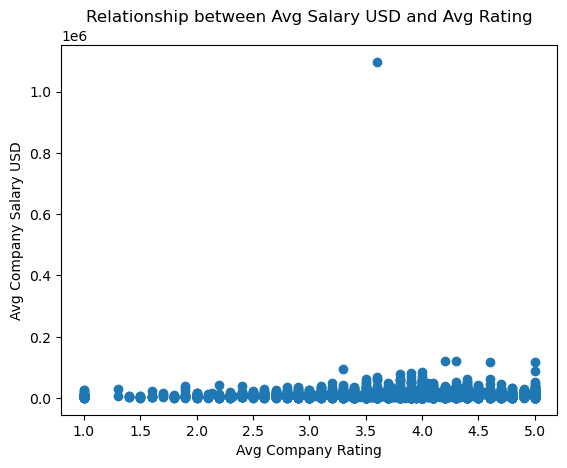

In [44]:
# show the relationship between average Salary USD and average Rating for each Company Name
plt.scatter(x='Rating', y='Salary USD', data=avg_sps)
plt.xlabel('Avg Company Rating')
plt.ylabel('Avg Company Salary USD')
plt.title('Relationship between Avg Salary USD and Avg Rating')

In [64]:
# check which Company Name has the average salary > 200.000 USD (Thapar University)
outlier_company = avg_sps.loc[avg_sps['Salary USD'] > 200000, 'Company Name'].iloc[0]
print(f"The Company representing the outlier observation is {outlier_company}")

The Company representing the outlier observation is Thapar University


Text(0.5, 1.0, 'Relationship between Avg Salary USD and Avg Rating (without outliers)')

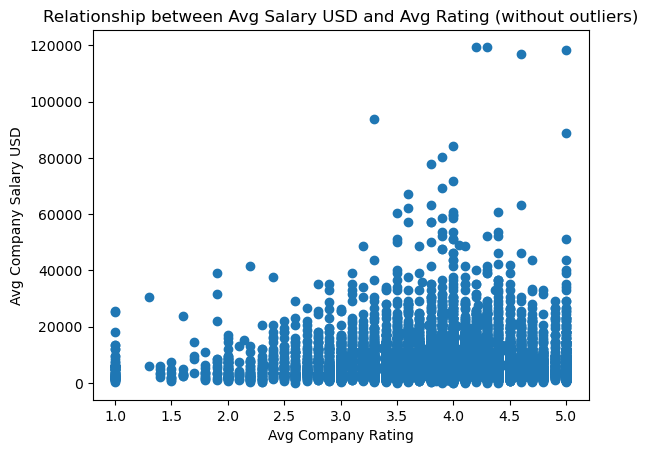

In [66]:
# show the previous relationship removing anomaly data
plt.scatter(x='Rating', y='Salary USD', data=avg_sps.loc[avg_sps['Salary USD'] < 200000])
plt.xlabel('Avg Company Rating')
plt.ylabel('Avg Company Salary USD')
plt.title('Relationship between Avg Salary USD and Avg Rating (without outliers)')